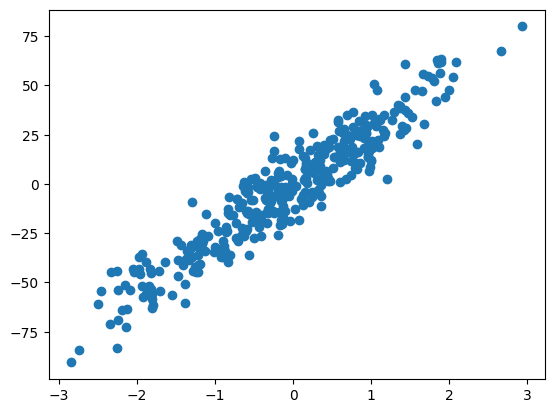

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=69)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

plt.scatter(X_train, y_train)

In [2]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.l1 = nn.Linear(1, 1)
        self.l2 = nn.Linear(1, 1)
    
    def forward(self, x):
        out = self.l1(x)
        out = F.relu(out)
        out = self.l2(x)
        return out
    
model = LinearRegression()

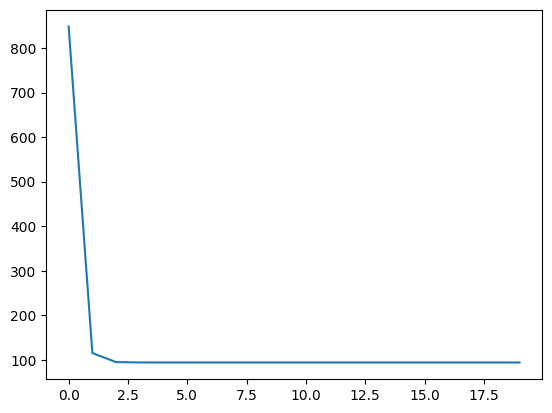

In [3]:
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

losses = np.array([])

model.train()
for epoch in range(20):
    total_loss = 0
    
    for i in range(len(X_train)):
        target = torch.from_numpy(X_train[i].astype(np.float32))
        label = torch.from_numpy(y_train[i].astype(np.float32))
        
        pred = model(target)
        loss = loss_func(pred, label)
        
        total_loss += float(loss)
        
        loss.backward()
    
    losses = np.append(losses, total_loss / len(X_train))
    optimizer.step()
    optimizer.zero_grad()
    
plt.plot(losses)

In [4]:
def r2_score(y_true, y_pred):
    ssr = 0
    for i in range(len(y_true)):
        yy = torch.from_numpy(y_true[i].astype(np.float32))
        yp = torch.from_numpy(y_pred[i].astype(np.float32))
        
        ssr += float(loss_func(yp, yy))
    
    y_true_mean = np.mean(y_true)
    
    sst = np.sum((y_true - y_true_mean)**2)
    
    return 1 - (ssr / sst)
    

0.876405293266324

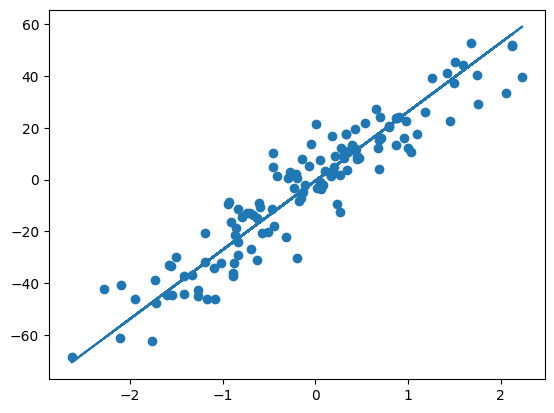

In [5]:
preds = np.array([])
total_loss = 0
for i in range(len(X_test)):
    target = torch.from_numpy(X_test[i].astype(np.float32))
    label = torch.from_numpy(y_test[i].astype(np.float32))

    with torch.no_grad():
        pred = model(target)
        
    preds = np.append(preds, pred)
    
plt.plot(X_test, preds)
plt.scatter(X_test, y_test)
r2_score(y_test, preds.reshape(-1, 1))